In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
from lifelines import KaplanMeierFitter
from lifelines.utils import survival_table_from_events

n = 1000
np.random.seed(42)
time_to_event = np.random.randint(5, 50, n)
event_occurred = np.random.binomial(1, 0.8, n)
gender = np.random.binomial(1, 0.5, n)
age = np.random.normal(50, 10, n)

# create dataframe
df = pd.DataFrame({
    'time_to_event': time_to_event,
    'event_occurred': event_occurred,
    'gender': gender,
    'age': age
})

<AxesSubplot: xlabel='timeline'>

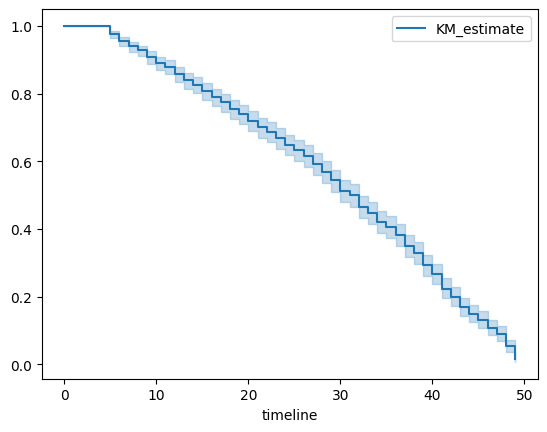

In [7]:
kmf = KaplanMeierFitter()
kmf.fit(df['time_to_event'], event_observed=df['event_occurred'])
survival_curve = kmf.survival_function_
kmf.plot()

In [10]:
table = survival_table_from_events(df['time_to_event'], df['event_occurred'])
kmf.fit(table['observed'], timeline=table['event_at'])
curve = kmf.survival_function_.loc[:30]


KeyError: 'event_at'

In [5]:
import lifelines
print(lifelines.__version__)

0.27.4
